In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier
# from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('./heart-attack-risk-analysis-dataset/train.csv')
test_df = pd.read_csv('./heart-attack-risk-analysis-dataset/test.csv')
# combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['Patient ID' 'Age' 'Sex' 'Cholesterol' 'Blood Pressure' 'Heart Rate'
 'Diabetes' 'Family History' 'Smoking' 'Obesity' 'Alcohol Consumption'
 'Exercise Hours Per Week' 'Diet' 'Previous Heart Problems'
 'Medication Use' 'Stress Level' 'Sedentary Hours Per Day' 'Income' 'BMI'
 'Triglycerides' 'Physical Activity Days Per Week' 'Sleep Hours Per Day'
 'Country' 'Continent' 'Hemisphere' 'Heart Attack Risk']


In [9]:
train_df.head(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1
5,KHV5233,64,Male,185,173/83,45,1,1,1,1,...,7.693001,42982,25.119107,746,7,5,Spain,Europe,Southern Hemisphere,1
6,ASX1153,86,Male,350,151/90,71,0,0,1,0,...,9.844307,173603,32.975464,367,0,5,France,Europe,Northern Hemisphere,0
7,IHZ5789,85,Male,246,145/76,81,0,0,1,1,...,1.308301,48258,35.143066,398,7,4,South Africa,Africa,Southern Hemisphere,1
8,SOL3892,61,Male,149,165/74,93,1,1,1,1,...,7.433028,298442,33.541112,85,6,7,Germany,Europe,Northern Hemisphere,1
9,CIN0912,28,Male,306,151/75,56,1,0,1,1,...,2.148214,224180,24.558969,729,2,5,Argentina,South America,Southern Hemisphere,0


In [10]:
train_df.tail(10)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
7000,MCT0325,64,Female,371,104/66,69,0,1,1,1,...,3.240391,103863,24.208147,160,2,10,Vietnam,Asia,Northern Hemisphere,0
7001,BBT2387,26,Male,185,140/71,110,1,1,1,1,...,1.402727,102011,34.726882,218,2,5,Brazil,South America,Southern Hemisphere,0
7002,GZL1934,85,Male,199,110/81,55,0,1,1,1,...,2.451802,49308,30.884526,31,5,10,India,Asia,Northern Hemisphere,1
7003,AQO5717,27,Female,387,136/103,109,1,1,0,0,...,8.722415,85825,32.965881,176,2,10,Vietnam,Asia,Northern Hemisphere,0
7004,UCB6977,68,Male,391,171/101,58,1,1,1,0,...,8.577241,210672,22.910692,613,5,4,United Kingdom,Europe,Northern Hemisphere,0
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,6.806894,236184,27.521246,598,4,5,France,Europe,Northern Hemisphere,0
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,3.015648,264390,21.332449,465,4,4,United Kingdom,Europe,Northern Hemisphere,0
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,4.825724,198358,37.465577,674,6,9,Colombia,South America,Northern Hemisphere,0
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,6.546390,202828,28.605789,623,7,10,Spain,Europe,Southern Hemisphere,1
7009,CWO3455,61,Male,176,172/60,56,0,1,1,0,...,6.651328,25823,22.057046,224,7,10,India,Asia,Northern Hemisphere,0


In [11]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       7010 non-null   object 
 1   Age                              7010 non-null   int64  
 2   Sex                              7010 non-null   object 
 3   Cholesterol                      7010 non-null   int64  
 4   Blood Pressure                   7010 non-null   object 
 5   Heart Rate                       7010 non-null   int64  
 6   Diabetes                         7010 non-null   int64  
 7   Family History                   7010 non-null   int64  
 8   Smoking                          7010 non-null   int64  
 9   Obesity                          7010 non-null   int64  
 10  Alcohol Consumption              7010 non-null   int64  
 11  Exercise Hours Per Week          7010 non-null   float64
 12  Diet                

* Above 50% of the patients are over 53 y/0 - This also appears to be a Normal distribution - mean == median. Could also be any other kind of
    symmetrical distribution [Continuous]
* Cholesterol seems to be a Gaussian distribution. Median and Mean seem to revolve around 259 [Continuous]
* The same goes for hear rate [Continuous]
* 50% or more people have diabetes [Binary]
* Around 25% of the people have family history [Binary]
* Around 75% or more people smoke [Binary]
* Around 25% of the people are obese [Binary]
* 50% or more people consume alcohol [Binary]
* Exercise per week appears to be a symmetrical distribution (mean == median) with mean around 10 [Continuous]
* About 25% people have previous heart problems [Binary]
* 50% or more people use medicine [Binary]
* Stress Level - appears to be a symmetrical distribution [Continuous]
* Sedentary hours per day - appears to be symmetrical [Continuous]
* Income also appears to be a symmetrical distribution [Continuous]
* BMI appears to be a symmetrical distribution [Continuous]
* Trigylcerida also appears to be a symmetrical distribution [Continuous]
* Physical Activity days per week appears to be a symmetrical distribution [Continuous]
* Sleep hours per day also appears to be a symmetrical distribution [Continuous]
* Around 25% of the people have heart attack risk


* **Continuous to Categorical**: Age, Cholesterol, heart rate, exercise per week, stress level, sedentary hours, income, bmi, triglyceride, physical activities, sleep  hours per day

In [12]:
train_df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.00000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.510414,259.880742,75.105991,0.652782,0.491869,0.896291,0.499857,0.595863,9.979109,0.498146,0.500143,5.451783,5.994007,158245.34893,28.878692,416.782026,3.491583,7.024822,0.357204
std,21.290957,80.709248,20.507160,0.476120,0.499970,0.304904,0.500036,0.490759,5.769721,0.500032,0.500036,2.857989,3.472022,80585.31666,6.322401,224.195136,2.281077,1.990908,0.479210
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.00000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.046024,0.000000,0.000000,3.000000,2.971831,88368.00000,23.422280,221.000000,2.000000,5.000000,0.000000
50%,53.000000,259.000000,75.000000,1.000000,0.000000,1.000000,0.000000,1.000000,9.982968,0.000000,1.000000,5.000000,5.936919,157378.50000,28.737627,416.000000,3.000000,7.000000,0.000000
75%,72.000000,329.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.029659,1.000000,1.000000,8.000000,9.017592,227218.50000,34.321158,613.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.00000,39.993581,800.000000,7.000000,10.000000,1.000000


* More males 
* Interesting a lot of people have the same blood pressures - there are only 3590 unique pressures. Maybe we could engineer a feature: the sum

In [14]:
train_df.describe(include=['O'])

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
count,7010,7010,7010,7010,7010,7010,7010
unique,7010,2,3590,3,20,6,2
top,RDG0550,Male,101/93,Healthy,Argentina,Asia,Northern Hemisphere
freq,1,4891,8,2351,386,2028,4526


## **Visualizing Categorical Data**
* Looks like sex, Diet, Country, Hemisphere is not all that useful
* Continent might be slightly useful - Americas, Africa and Australia lead to higher heart attack risk
* It might be worth grouping countries - first world country (higher risk), third world countries (lower risk) etc.

In [16]:
train_df[['Sex', 'Heart Attack Risk']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

,Sex,Heart Attack Risk
1,Male,0.358209
0,Female,0.354884


In [17]:
train_df[['Diet', 'Heart Attack Risk']].groupby(['Diet'], as_index=False).mean().sort_values(by='Diet', ascending=False)

,Diet,Heart Attack Risk
2,Unhealthy,0.362381
1,Healthy,0.364100
0,Average,0.345152


In [18]:
train_df[['Country', 'Heart Attack Risk']].groupby(['Country'], as_index=False).mean().sort_values(by='Country', ascending=False)

,Country,Heart Attack Risk
19,Vietnam,0.338068
18,United States,0.384848
17,United Kingdom,0.337875
16,Thailand,0.370262
15,Spain,0.348214
14,South Korea,0.401840
13,South Africa,0.345029
12,Nigeria,0.386111
11,New Zealand,0.340909
10,Japan,0.321637


In [19]:
train_df[['Continent', 'Heart Attack Risk']].groupby(['Continent'], as_index=False).mean().sort_values(by='Continent', ascending=False)

,Continent,Heart Attack Risk
5,South America,0.372727
4,North America,0.382006
3,Europe,0.343400
2,Australia,0.364146
1,Asia,0.347140
0,Africa,0.366097


In [20]:
train_df[['Hemisphere', 'Heart Attack Risk']].groupby(['Hemisphere'], as_index=False).mean().sort_values(by='Hemisphere', ascending=False)

,Hemisphere,Heart Attack Risk
1,Southern Hemisphere,0.354670
0,Northern Hemisphere,0.358595


In [ ]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Age', bins=15)

## **Correlating Categorical features**

* Looks like there is a relationship between sex, continent (Especially for Asia & Female, North America & Female, Male & Europe) and their associated heart attack risk
* There is a strange relationship between diet and continent. Turns out Unhealthy diet leads lower risks compared to average & healthy diets in South America & Africa


* **For now, using diet, sex and continent**

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


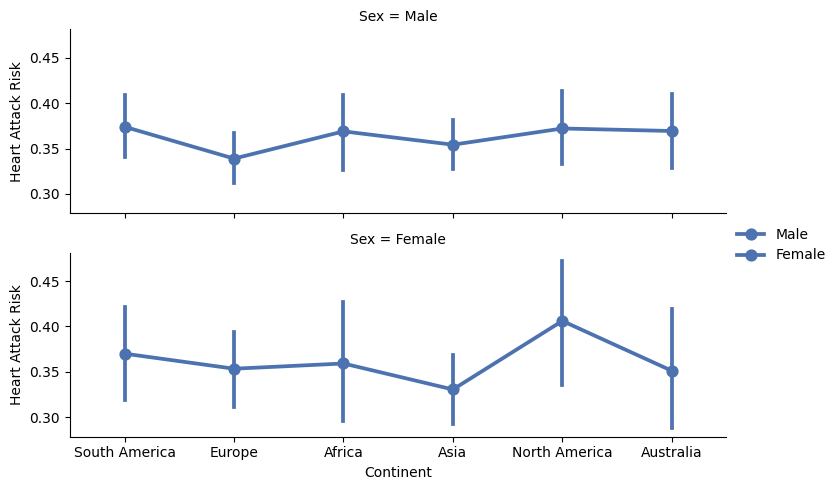

In [26]:
grid = sns.FacetGrid(train_df, row='Sex', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Continent', 'Heart Attack Risk', 'Sex', palette='deep')
grid.add_legend()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


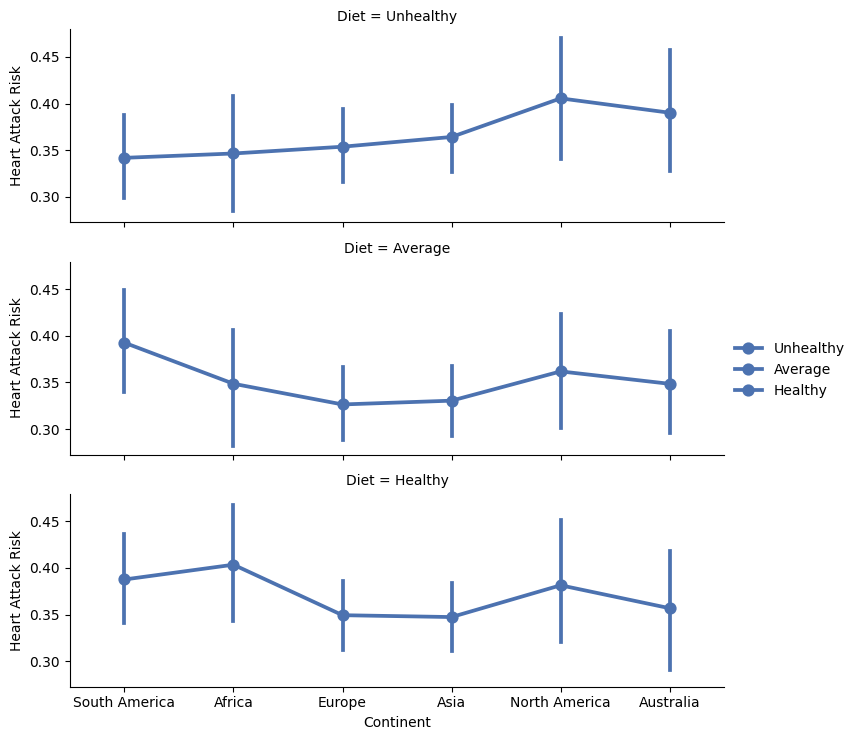

In [27]:
grid = sns.FacetGrid(train_df, row='Diet', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Continent', 'Heart Attack Risk', 'Diet', palette='deep')
grid.add_legend()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


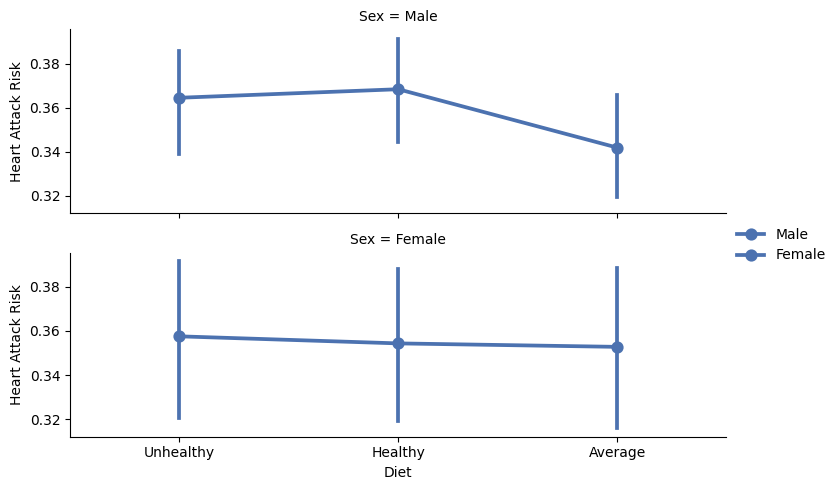

In [29]:
grid = sns.FacetGrid(train_df, row='Sex', height=2.5, aspect=3.0)
grid.map(sns.pointplot, 'Diet', 'Heart Attack Risk', 'Sex', palette='deep')
grid.add_legend()

## **Visualizing Continuous data**
* No relationship between age and risk 
* Seems to be a relationship between Cholesterol range and risk = 1
* Average diet but more exercise > less risk. Average diet but less exercise, more risk
* Don't see how stress level is useful
* Sedentary might be useful
* There seems to be a relationship between higher salary and higher risk. This might be a correlation through diet. [**Take a look later**]
* Seems to be a relationship between risk = 1, lower end of and the very high end of BMI
* Triglyceride seems to vary for risk = 1 ever so slightly
* No relation with physical activity days per week
* Sleep hours per day seems to influence (negative correlation) risk = 1
**For now taking Cholesterol, exercise, sedentary, Income, BMI, Triglyceride, Sleep Hrs per day**

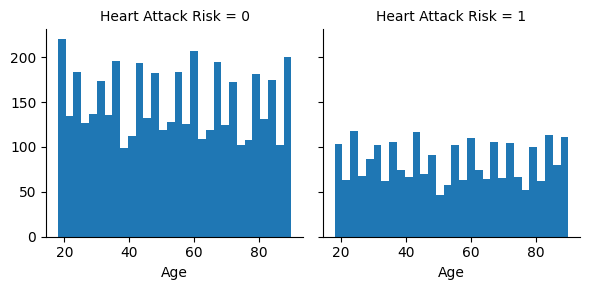

In [35]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Age', bins=30)

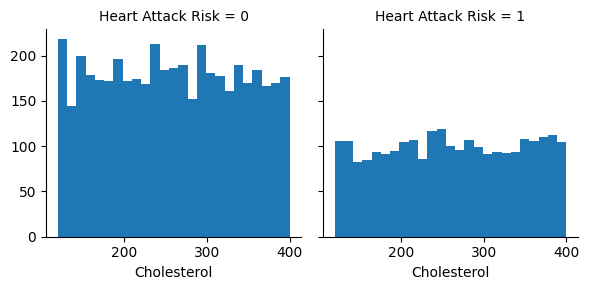

In [38]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Cholesterol', bins=25)

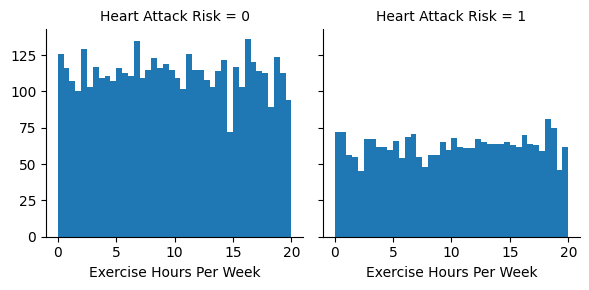

In [41]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Exercise Hours Per Week', bins=40)

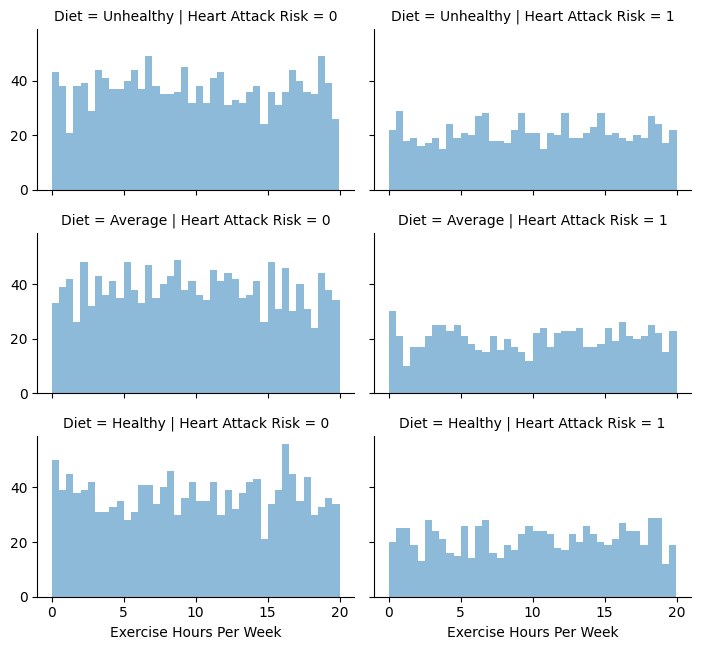

In [43]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Heart Attack Risk', row='Diet', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Exercise Hours Per Week', alpha=.5, bins=40)
grid.add_legend();

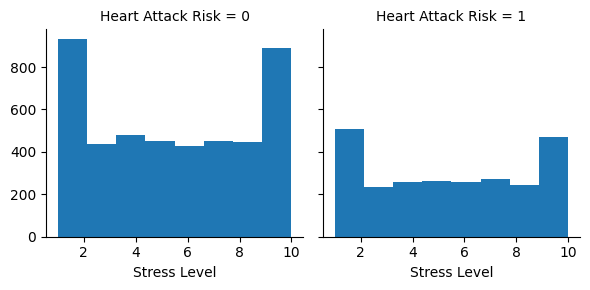

In [53]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Stress Level', bins=8)

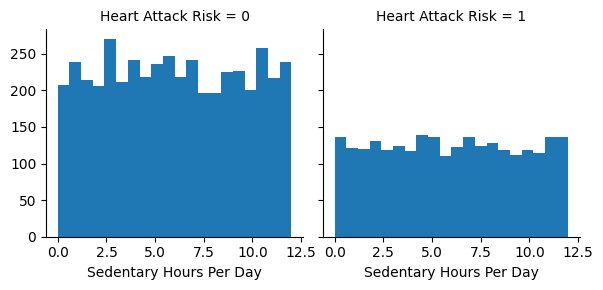

In [60]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Sedentary Hours Per Day', bins=20)

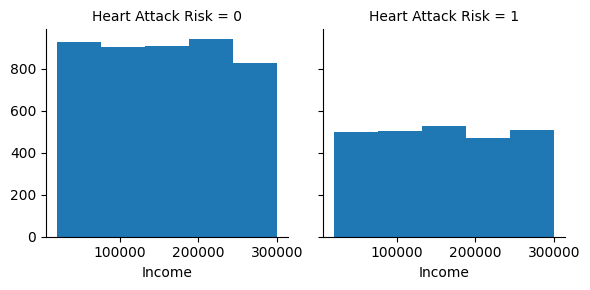

In [66]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Income', bins=5)

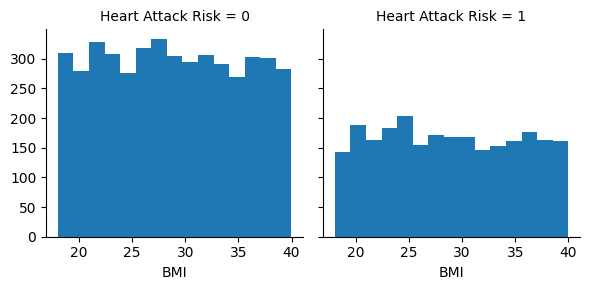

In [73]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'BMI', bins=15)

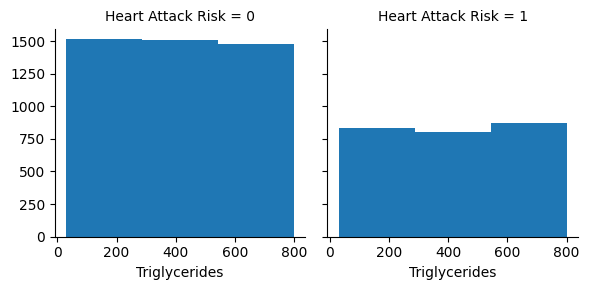

In [77]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Triglycerides', bins=3)

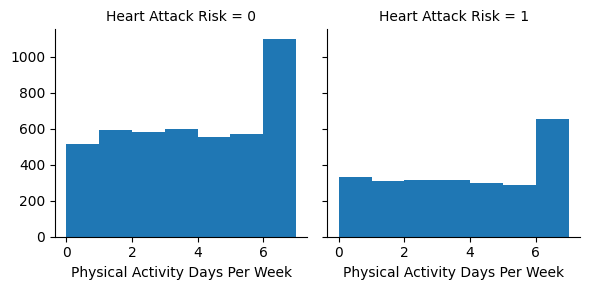

In [80]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Physical Activity Days Per Week', bins=7)

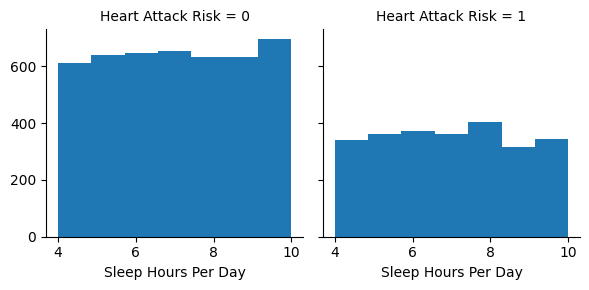

In [91]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Sleep Hours Per Day', bins=7)

## Correlating Binary Data
* Diabetes seems useful
* Family history seems irrelevant
* Smoking, Obesity, Alcohol consumption is inversely related (!!). **Might drop later or make one feature out of these**
* Previous heart problem seems useful
* Medication doesn't seem useful

**Using Diabetes, Smoking, Obesity, Alcohol, Previous Heart Problems**


In [4]:
train_df[["Diabetes", "Heart Attack Risk"]].groupby(['Diabetes'], as_index=False).mean().sort_values(by='Diabetes', ascending=True)

,Diabetes,Heart Attack Risk
0,0,0.336483
1,1,0.368226


In [5]:
train_df[["Family History", "Heart Attack Risk"]].groupby(['Family History'], as_index=False).mean().sort_values(by='Family History', ascending=True)

,Family History,Heart Attack Risk
0,0,0.359629
1,1,0.354698


In [6]:
train_df[["Smoking", "Heart Attack Risk"]].groupby(['Smoking'], as_index=False).mean().sort_values(by='Smoking', ascending=True)

,Smoking,Heart Attack Risk
0,0,0.364512
1,1,0.356358


In [7]:
train_df[["Obesity", "Heart Attack Risk"]].groupby(['Obesity'], as_index=False).mean().sort_values(by='Obesity', ascending=True)

,Obesity,Heart Attack Risk
0,0,0.363092
1,1,0.351313


In [8]:
train_df[["Alcohol Consumption", "Heart Attack Risk"]].groupby(['Alcohol Consumption'], as_index=False).mean().sort_values(by='Alcohol Consumption', ascending=True)

,Alcohol Consumption,Heart Attack Risk
0,0,0.362866
1,1,0.353364


In [9]:
train_df[["Previous Heart Problems", "Heart Attack Risk"]].groupby(['Previous Heart Problems'], as_index=False).mean().sort_values(by='Previous Heart Problems', ascending=True)

,Previous Heart Problems,Heart Attack Risk
0,0,0.350767
1,1,0.363688


In [10]:
train_df[["Medication Use", "Heart Attack Risk"]].groupby(['Medication Use'], as_index=False).mean().sort_values(by='Medication Use', ascending=True)

,Medication Use,Heart Attack Risk
0,0,0.357306
1,1,0.357102


## Data preprocessing

* Splitting up heart rate and take addition
* Clearly, the sum BP is correlated to Heart risk. The graph is left skewed when risk = 0 and right skewed when it's right skewed, so **using Sum BP**

In [13]:
train_df['Sum BP'] = train_df['Blood Pressure'].apply(lambda x: sum(int(num) for num in x.split('/')))
train_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Sum BP
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,219
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,264
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,270
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,182
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,263


In [ ]:
#calculate the Sum BP for test set as well and drop Blood Pressure from both
test_df['Sum BP'] = train_df['Blood Pressure'].apply(lambda x: sum(int(num) for num in x.split('/')))
train_df.drop(['Blood Pressure'], axis=1)
test_df.drop(['Blood Pressure'], axis=1)

In [17]:
train_df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Sum BP
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,219
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,264
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,270
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,182
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,263


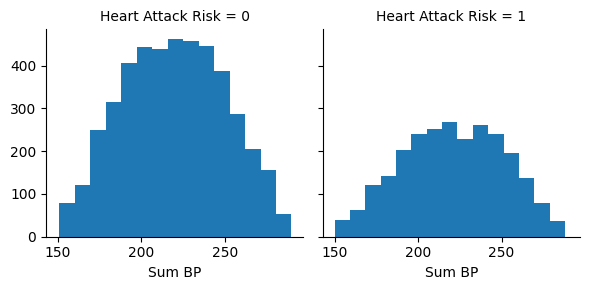

In [24]:
g = sns.FacetGrid(train_df, col='Heart Attack Risk')
g.map(plt.hist, 'Sum BP', bins=15)